In [66]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
X = np.empty((100, 2))
np.random.seed = 666
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] =0.75 * X[:, 0] + 3. + np.random.normal(0, 10. , size=100)

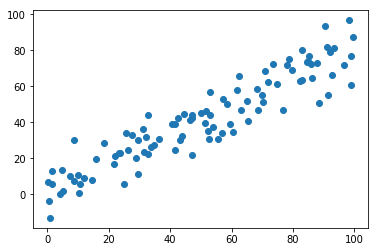

In [6]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [ ]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.7)
plt.show()

In [3]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(0, 1, size=100)

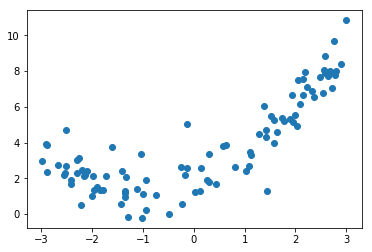

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_predict = lin_reg.predict(X)

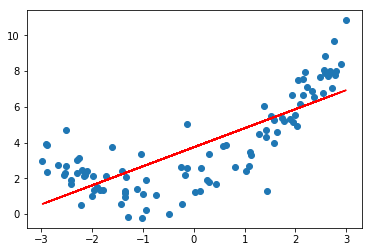

In [10]:
plt.scatter(X, y)
plt.plot(x, y_predict, color='r')
plt.show()

### 解决方案， 添加一个特征

In [12]:
(X**2).shape

(100, 1)

In [13]:
X2 = np.hstack([X, X**2])

In [14]:
X2.shape

(100, 2)

In [24]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_predict2 = lin_reg2.predict(X2)

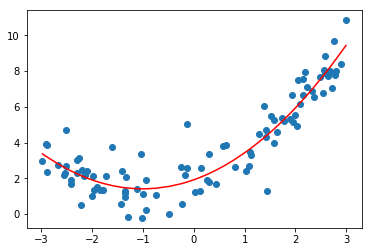

In [26]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [27]:
lin_reg2.coef_

array([1.00710756, 0.50168455])

In [28]:
lin_reg2.intercept_

1.9171844030888476

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)


In [33]:
X2.shape

(100, 3)

In [35]:
X2[0]

array([ 1.        , -0.13170149,  0.01734528])

In [36]:
X[0]

array([-0.13170149])

In [39]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_predict2 = lin_reg2.predict(X2)

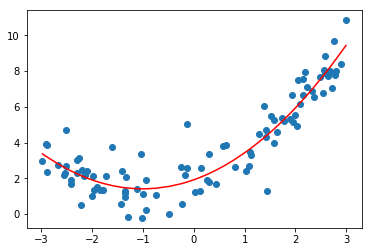

In [41]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [42]:
lin_reg2.coef_

array([0.        , 1.00710756, 0.50168455])

In [45]:
X  = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [46]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [48]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [49]:
X2[:4]

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.],
       [ 1.,  7.,  8., 49., 56., 64.]])

In [50]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

# Pipeline

In [51]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(0, 1, size=100)

In [56]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)), 
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression() )
])

poly_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [59]:
y_predict = poly_reg.predict(X)

In [63]:
poly_reg.score(X,y)

0.8093346175982531

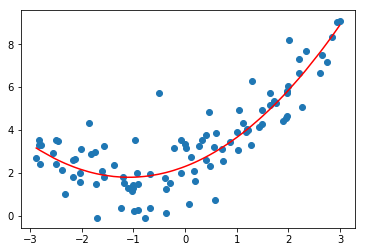

In [61]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

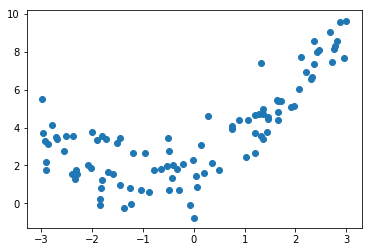

In [62]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x +2 + np.random.normal(0, 1, size=100)
plt.scatter(X, y)
plt.show()

In [67]:
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.117570693489153

In [77]:
lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)), 
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg )
     ])


In [79]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=100, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [80]:
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6880333823837224

In [82]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

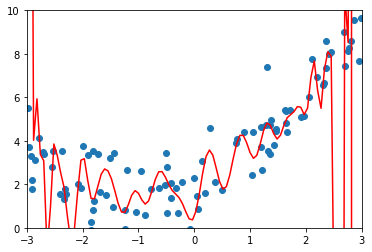

In [83]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot,  color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

# 领回归

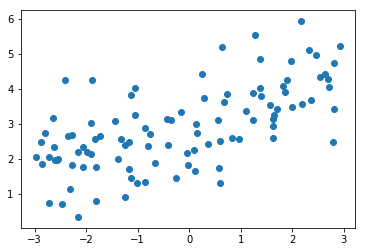

In [86]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
plt.scatter(X, y)
plt.show()

In [ ]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)), 
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression() )
     ])



In [87]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

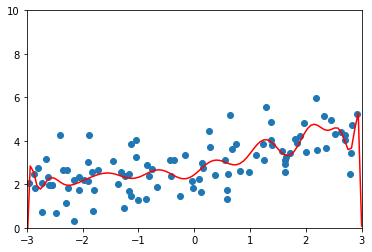

In [88]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot,  color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

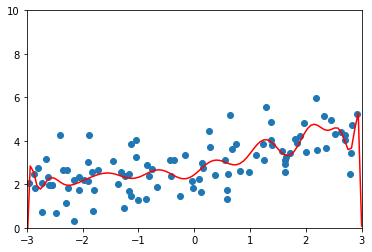

In [90]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot,  color='r')
    plt.axis([-3, 3, 0, 10])
    plt.show()
plot_model(poly_reg)

# 使用领回归

In [102]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, aplha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)), 
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=aplha) )
     ])


np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

1.3233492754136291


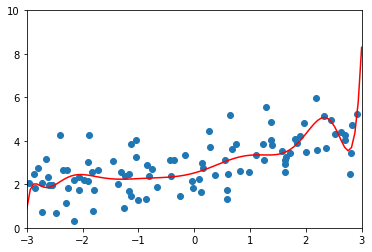

In [103]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y_poly_predict = ridge1_reg.predict(X_test)
error = mean_squared_error(y_test, y_poly_predict)
print(error)
plot_model(ridge1_reg)

1.1888759304218461


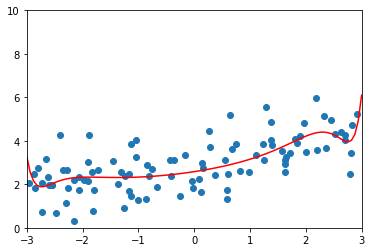

In [104]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y_poly_predict = ridge2_reg.predict(X_test)
error = mean_squared_error(y_test, y_poly_predict)
print(error)
plot_model(ridge2_reg)

NameError: name 'a' is not defined